<a href="https://colab.research.google.com/github/sheillanathasya/EDA_PYTHON/blob/main/EDA_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount google drive
from google.colab import drive
drive.mount ('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read data
data = pd.read_csv('/content/gdrive/MyDrive/Salary_Data3.csv')

In [4]:
#print data
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [5]:
# simple data checking
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


There are 6 column and 6704 rows.

All column have missing values

# **1. Missing Values Checking and Handling**

In [6]:
# number of missing values in each column
data.isna().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [7]:
#drop missing values
data = data.dropna()

In [8]:
# checking data
data.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

done! there no more missing values.

# **2. Duplicate Data Checking and Handling**

In [9]:
# number of duplicated values
data.duplicated().sum()

4912

there are 4911 duplicated rows, we will drop it later. because we want to unique data will be analysis

In [11]:
# sample duplicated rows
data[data.duplicated(keep=False)].sort_values('Age').head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
5083,21.0,Female,High School,Junior Sales Representative,0.0,25000.0
5018,21.0,Female,High School,Junior Sales Representative,0.0,25000.0
4975,21.0,Female,High School,Junior Sales Representative,0.0,25000.0
4962,21.0,Female,High School,Junior Sales Representative,0.0,25000.0
5031,21.0,Female,High School,Junior Sales Representative,0.0,25000.0
4949,21.0,Female,High School,Junior Sales Representative,0.0,25000.0
4936,21.0,Female,High School,Junior Sales Representative,0.0,25000.0
5122,21.0,Female,High School,Junior Sales Representative,0.0,25000.0
4923,21.0,Female,High School,Junior Sales Representative,0.0,25000.0
5044,21.0,Female,High School,Junior Sales Representative,0.0,25000.0


In [12]:
# drop duplicated rows
data = data.drop_duplicates()

In [14]:
# data checking
data.duplicated().sum()

0

DONE!

# **3. Statistical Summaries of Column**

In [15]:
#grouping column by data category
categoricals = ['Gender', 'Education Level','Job Title']
numericals = ['Age','Years of Experience','Salary']

In [16]:
#numerical statistic summary
data[numericals].describe()

,Age,Years of Experience,Salary
count,1786.000000,1786.000000,1786.000000
mean,35.142217,9.159015,113220.037514
std,8.214760,6.845753,51589.303161
min,21.000000,0.000000,350.000000
25%,29.000000,3.000000,70000.000000
50%,33.000000,8.000000,110000.000000
75%,41.000000,13.000000,160000.000000
max,62.000000,34.000000,250000.000000


findings:

1. Mean ~ 50% in column 'Salary', indicating a symetrical distribution.
2. Mean > 50% (Median) in column 'Age' and 'Years of Experience' indicates a positively skewed diistribution.

In [17]:
# categorical statistic summary
data[categoricals].describe()

,Gender,Education Level,Job Title
count,1786,1786,1786
unique,2,5,191
top,Male,Bachelor's,Software Engineer Manager
freq,973,767,127


most of them is male.

In [19]:
data["Education Level"].replace({"phD": "PhD"}, inplace=True)

# **4. Univariate Analysis**

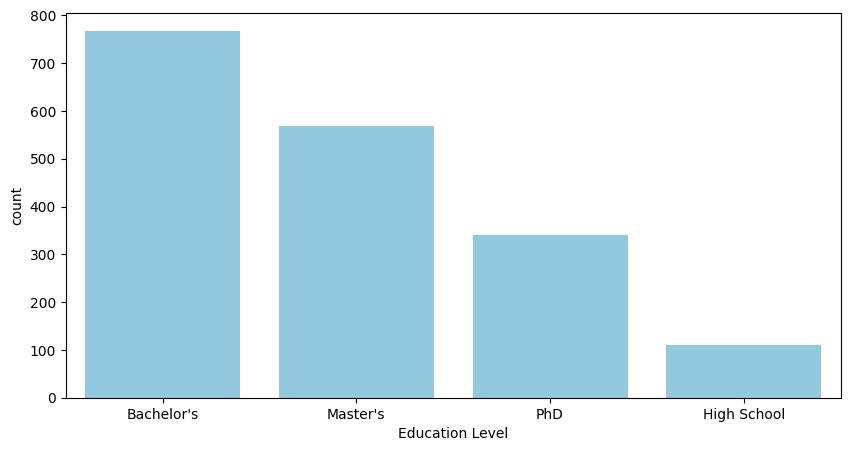

In [29]:
fig, axes = plt.subplots(figsize = (10, 5))
sns.countplot( x = 'Education Level', data = data, color = 'skyblue',
              order = data['Education Level'].value_counts().index);


many employee have education in Bachelor's Degree.

<Axes: xlabel='Gender', ylabel='count'>

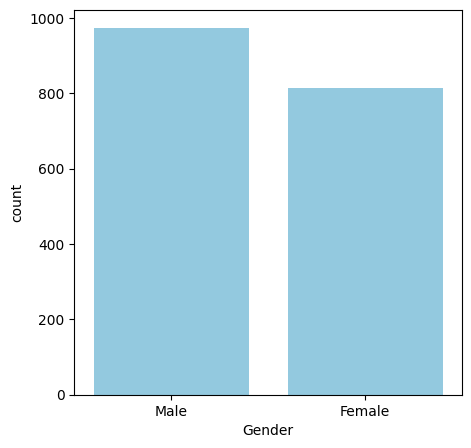

In [31]:
fig, axes = plt.subplots(figsize =(5,5))
sns.countplot( x = 'Gender', data = data, color = 'skyblue',
              order = data['Gender'].value_counts().index)

most of employee is male, but ratio for male and female not that significant.

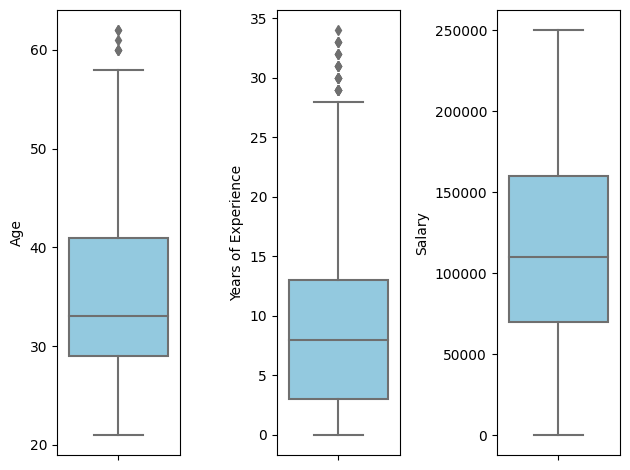

In [32]:
#boxplot to detect outliers
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='skyblue')
    plt.tight_layout()

findings:

there are many outlier in the 'Years of Experienced' and 'Age' column.

<ipython-input-33-07e0b92f1d8b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data[features[i]], color='skyblue')
<ipython-input-33-07e0b92f1d8b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data[features[i]], color='skyblue')
<ipython-input-33-07e0b92f1d8b>:6: UserWarning: 

`distplo

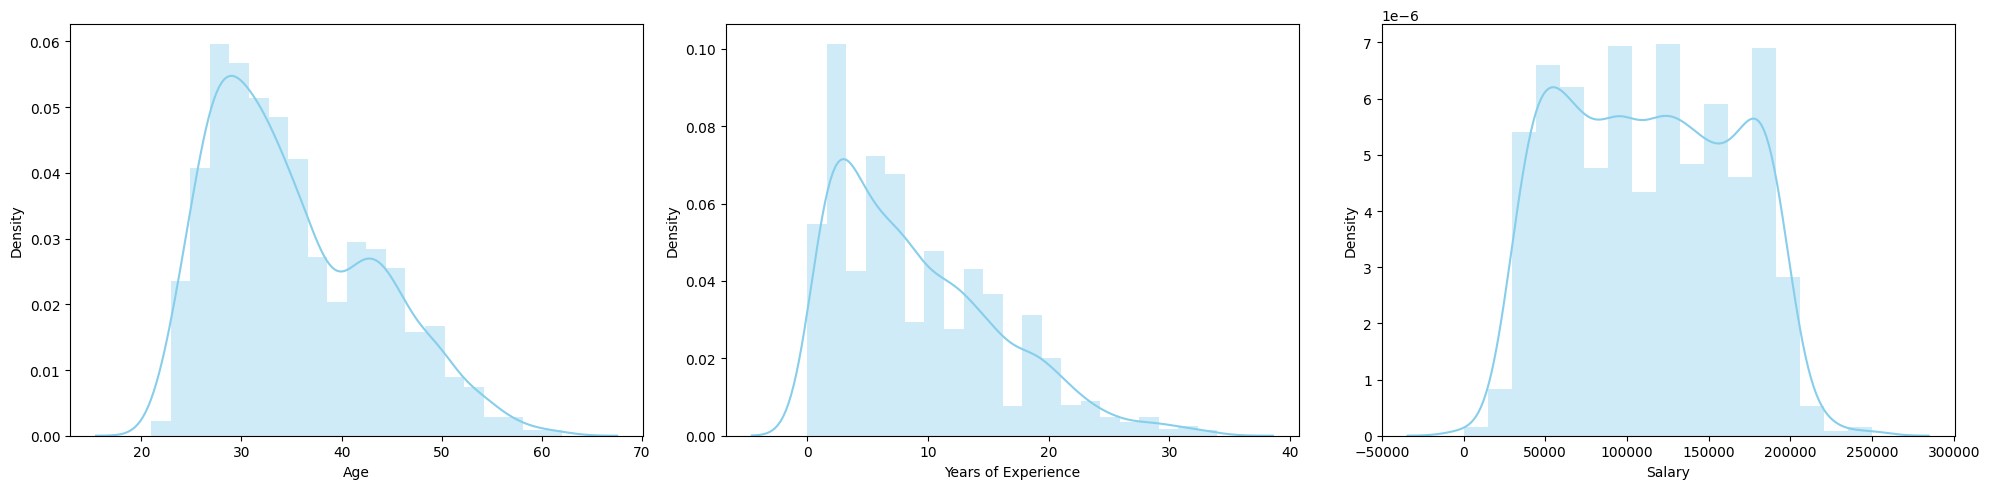

In [33]:
features = numericals
plt.figure(figsize=(20,5))
for i in range(0, len(features)):
    #plt.subplot(2, len(features)//2, i+1)
    plt.subplot(1, len(features), i+1)
    sns.distplot(x=data[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

findings :

1. 'Salary' column has symmetrical distribution.
2. 'Age' and 'Years of Experience' have positively skewed distribution.

# **5. Bivariate Analysis**

<ipython-input-34-90a3bdc16975>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


<Axes: >

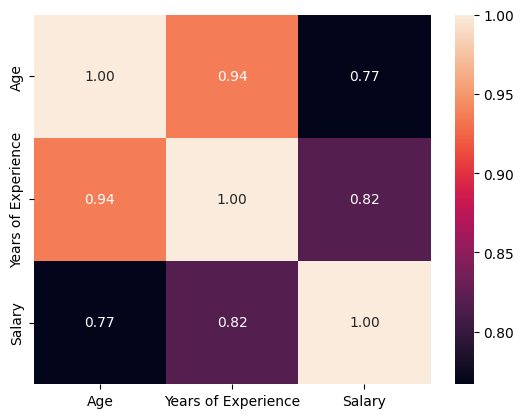

In [34]:
# Correlation using heatmap
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Findings:

there is highly correlated between 'Age' & 'Years of Experienced'

# **6. Overall Summary**

1. The data does not contain major issues. There are only some NULL values and duplicated rows. I've handled them accordingly.
2. There are many outliers in 'Age' and 'Years of Experience'.
3. From corelation map, there is higly corelated between 'Age' and 'Years of Experience'.